In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import platform
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['axes.unicode_minus'] = False

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

### 다중 클래스 분류

로지스틱 회귀의 softmax를 제외한 다른 많은 모델들은 이진 분류만을 지원한다.
그래서 이진 분류 알고리즘을 다중 클래스 알고리즘으로 확장을 해야 된다.

확장 방법은 **일대다(one vs rest 또는 one vs all)** 방법이 있다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습 시킨다. 결국, **클래스의 개수만큼 이진 분류 모델이 만들어진다.**

- 로지스틱 분류에서는 **소프트맥스 함수**의 결과값인 **확률값**을 기준으로 분류를 한다.
    - $Pr(Y_i = c) = \frac{e^{W_2 * X_i}}{\sum_{k=1}^{K} e ^ {W_k * X_i}}$

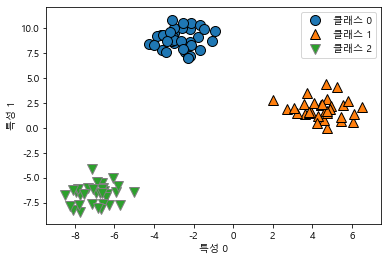

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기 : ", linear_svm.coef_.shape)
df_coef = pd.DataFrame(columns=["특성 0","특성 1"] ,data=linear_svm.coef_)
df_coef

계수 배열의 크기 :  (3, 2)


,특성 0,특성 1
0,-0.174924,0.231401
1,0.476217,-0.069366
2,-0.189142,-0.204006


In [5]:
print("절편 배열의 크기 : ", linear_svm.intercept_.shape)
df_intercept = pd.DataFrame(columns=["절편"], data = linear_svm.intercept_)
df_intercept

절편 배열의 크기 :  (3,)


,절편
0,-1.077456
1,0.131405
2,-0.086050


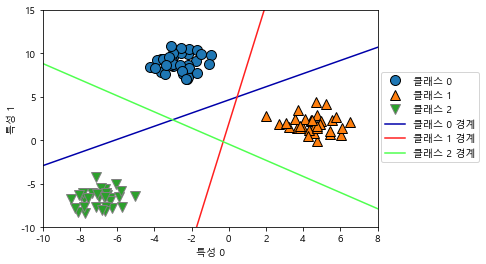

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15) # -15 ~ 15 까지 50개의 수열을 생성

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color) # 판별 함수 사용

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계','클래스 1 경계', '클래스 2 경계'], loc=(1.01, 0.3))

Text(0, 0.5, '특성 1')

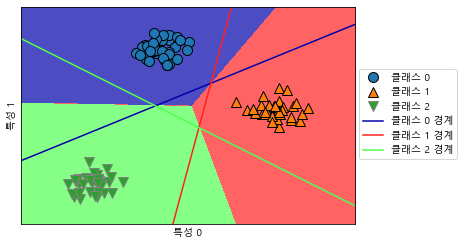

In [7]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], 
           loc=(1.01, 0.3))
plt.xlabel('특성 0')
plt.ylabel('특성 1')

- 선형 모델의 주요 매개변수는 **회귀 모델은 alpha**, **분류 모델(LinearSVC)에서는 C**입니다. 
- **alpha의 값이 클수록, C 값이 작아질 수록 모델은 단순**해 집니다.
- 보통 **C, alpha는 로그 스케일로 조절**하는 것이 좋다.

- 선형 모델은 **학습 속도, 예측이 빠르고, 매우 큰 데이터 셋 또는 희소한 데이터 셋에도 잘 작동**한다.
- **Logistic Regression, Ridge의 solver = `sag`** 옵션을 줄 경우 기본 설정보다 더 빨리 처리 가능하다.